# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mochammad Abdul Rozak
- **Email:** rozak5067@gmail.com
- **ID Dicoding:** Mochammad Abdul Rozak

## Menentukan Pertanyaan Bisnis

- Berapa jumlah total sewa sepeda berdasarkan musim di Setiap Tahun?
- Bagaimana perbedaan total sewa sepeda antara hari kerja dan akhir pekan di setiap tahun?
- Bagaimana hubungan antara total sewa sepeda dengan suhu?

## Import Semua Packages/Library yang Digunakan

In [108]:
#Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [109]:
#Import data bike sharing counts aggregated on hourly basis
bike_hour = pd.read_csv("hour.csv")
bike_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [110]:
#Import data bike sharing counts aggregated on daily basis
bike_day = pd.read_csv("day.csv")
bike_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

**Menilai Data Sepeda per Jam**

In [111]:
#Informasi data  sepeda per jam secara general
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [112]:
#melihat apakah terdapat missing value
bike_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [113]:
#memeriksa data yang sama
print("Jumlah duplikasi pada data sepeda per jam:", bike_hour.duplicated().sum())

Jumlah duplikasi pada data sepeda per jam: 0


In [114]:
#statistika deskriptif pada data sepeda per jam
bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Menilai Data Sepeda per Hari**

In [115]:
#informasi secara general pada data sepeda pe hari
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [116]:
#melihat apakah terdapat missing value
bike_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [117]:
#memeriksa data yang sama
print("Jumlah duplikasi pada data sepeda per jam:", bike_day.duplicated().sum())

Jumlah duplikasi pada data sepeda per jam: 0


In [118]:
#statistika deskriptif pada data sepeda per hari
bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

**Mengubah Variabel Dtype dteday menjadi datetime**

In [119]:
#dteday pada data sepeda per jam
bike_hour["dteday"] = pd.to_datetime(bike_hour["dteday"])
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [120]:
#dteday pada data sepeda per hari
bike_day["dteday"] = pd.to_datetime(bike_day["dteday"])
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Menambahkan Kolom Baru year, seasons, dan type of day**

In [121]:
#menambahkan kolom tahun pada data sepeda per jam dan per hari
def year(yr):
    if yr == 0:
        return '2011'
    else:
        return '2012'

bike_hour['year'] = bike_hour['yr'].apply(year)
bike_day['year'] = bike_day['yr'].apply(year)

In [122]:
#menambahkan kolom musim pada data sepeda per jam dan hri
def musim(season):
    if season == 1:
        return 'springer'
    elif season == 2:
        return 'summer'
    elif season == 3:
        return 'fall'
    else:
        return 'winter'

bike_hour['seasons'] = bike_hour['season'].apply(musim)
bike_day['seasons'] = bike_day['season'].apply(musim)

In [123]:
#menambahkan kolom type of day pada data sepeda per jam dan hri
def jenis(workingday):
    if workingday == 0:
        return 'workingday'
    else:
        return 'weekend or holiday'

bike_hour['typeofday'] = bike_hour['workingday'].apply(jenis)
bike_day['typeofday'] = bike_day['workingday'].apply(jenis)

## Exploratory Data Analysis (EDA)

**Explore Data Jumlah Sepeda per Jam**



In [124]:
#Melihat jumlah sepeda yang disewa pada setiap musim di setiap tahun
bike_day.groupby(by=["year", "seasons"]).cnt.sum()

year  seasons 
2011  fall        419650
      springer    150000
      summer      347316
      winter      326137
2012  fall        641479
      springer    321348
      summer      571273
      winter      515476
Name: cnt, dtype: int64

In [125]:
#Melihat jumlah sepeda yang disewa pada hari kerja dan weekend atau holiday
bike_hour.groupby(by=["year", "typeofday"]).cnt.sum()

year  typeofday         
2011  weekend or holiday     856264
      workingday             386839
2012  weekend or holiday    1436146
      workingday             613430
Name: cnt, dtype: int64

**Explore Data Jumlah Sepeda per Hari**

In [126]:
#Melihat jumlah sepeda yang disewa pada setiap musim di setiap tahun
bike_day.groupby(by=["year", "seasons"]).cnt.sum()

year  seasons 
2011  fall        419650
      springer    150000
      summer      347316
      winter      326137
2012  fall        641479
      springer    321348
      summer      571273
      winter      515476
Name: cnt, dtype: int64

In [127]:
#Melihat jumlah sepeda yang disewa pada hari kerja dan weekend atau holiday
bike_day.groupby(by=["year", "typeofday"]).cnt.sum()

year  typeofday         
2011  weekend or holiday     856264
      workingday             386839
2012  weekend or holiday    1436146
      workingday             613430
Name: cnt, dtype: int64

In [163]:
bike_day.to_csv("dataset.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa jumlah total sewa sepeda berdasarkan musim di Setiap Tahun?

In [134]:
#Melihat jumlah sepeda yang disewa pada setiap musim di setiap tahun
bike_day_season = bike_day.groupby(by=["year", "seasons"]).cnt.sum().reset_index()
bike_day_season

,year,seasons,cnt
0,2011,fall,419650
1,2011,springer,150000
2,2011,summer,347316
3,2011,winter,326137
4,2012,fall,641479
5,2012,springer,321348
6,2012,summer,571273
7,2012,winter,515476


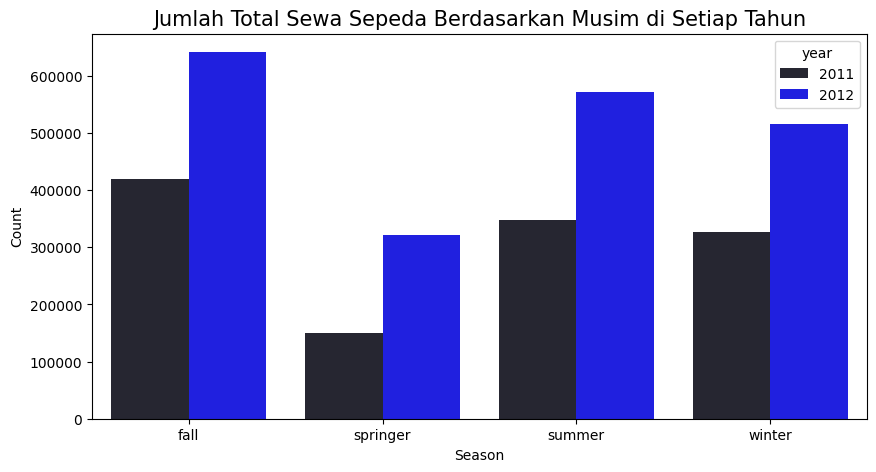

In [136]:
#Membuat grafik barchart
plt.figure(figsize=(10, 5))
sns.barplot(x=bike_day_season["seasons"], y=bike_day_season["cnt"], hue=bike_day_season['year'], palette='dark:blue')
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Jumlah Total Sewa Sepeda Berdasarkan Musim di Setiap Tahun", loc="center", fontsize=15)
plt.show()

### Pertanyaan 2: Bagaimana perbedaan penggunaan sepeda antara hari kerja dan akhir pekan di setiap tahun?

In [135]:
#Melihat jumlah sepeda yang disewa pada hari kerja dan weekend atau holiday
bike_day_typeofday = bike_day.groupby(by=["year", "typeofday"]).cnt.sum().reset_index()
bike_day_typeofday

,year,typeofday,cnt
0,2011,weekend or holiday,856264
1,2011,workingday,386839
2,2012,weekend or holiday,1436146
3,2012,workingday,613430


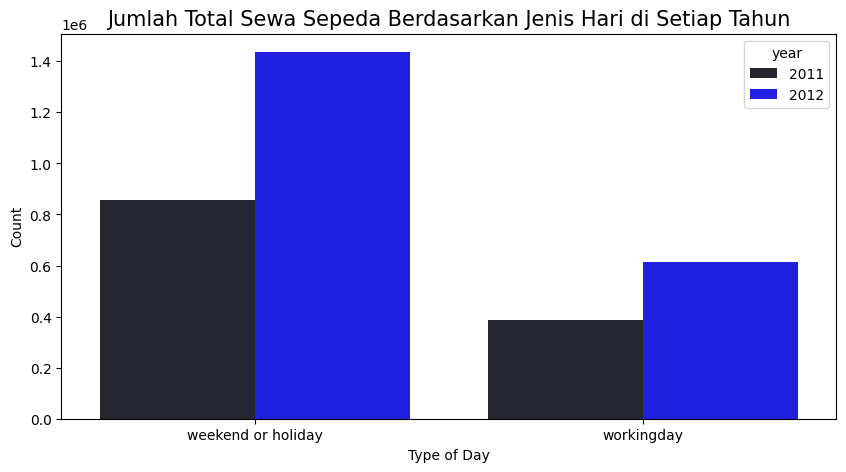

In [137]:
#Membuat grafik barchart
plt.figure(figsize=(10, 5))
sns.barplot(x=bike_day_typeofday["typeofday"], y=bike_day_typeofday["cnt"], hue=bike_day_typeofday['year'], palette='dark:blue')
plt.xlabel("Type of Day")
plt.ylabel("Count")
plt.title("Jumlah Total Sewa Sepeda Berdasarkan Jenis Hari di Setiap Tahun", loc="center", fontsize=15)
plt.show()

### Pertanyaan 3: Bagaimana hubungan antara total sewa sepeda dengan suhu?

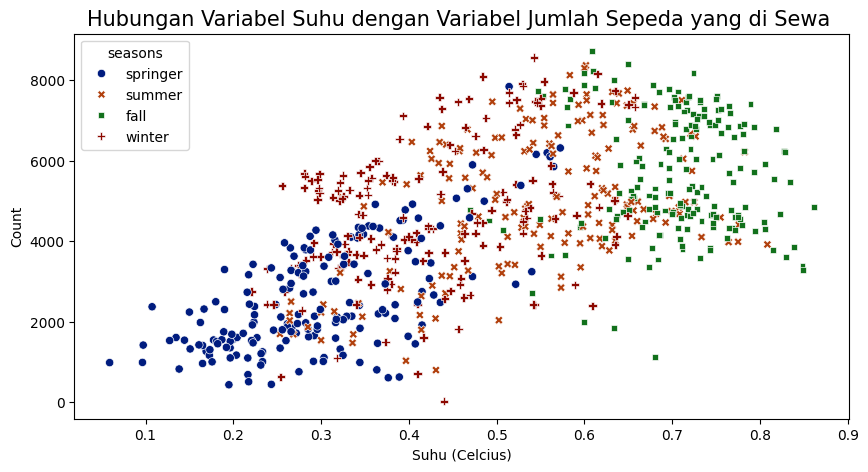

In [162]:
#Membuat grafik scatterplot guna melihat hubungan antar dua variabel
plt.figure(figsize=(10, 5))
sns.scatterplot(data=bike_day, x="temp", y="cnt", hue="seasons", style="seasons", palette='dark')
plt.xlabel("Suhu (Celcius)")
plt.ylabel("Count")
plt.title("Hubungan Variabel Suhu dengan Variabel Jumlah Sepeda yang di Sewa ", loc="center", fontsize=15)
plt.show()

## Conclusion

- **Conclution pertanyaan 1**: Berdasarkan hasil yang diperoleh dari data day.csv, diperoleh nilai tertinggi dari total sewa sepeda pada tahun 2011 terdapat pada season **fall** dengan total sepeda yang disewa sejumlah 419650, dan pada tahun 2012 juga nilai tertinggi yakni pada season **fall** dengan total sepeda yang disewa sejumlah 641479. Dengan ini dapat disimpulkan bahwa pada saat season fall jumlah sepeda yang disewa lebih banyak daripada season lainnya di setiap tahunnya.

- **Conclution pertanyaan 2**: Berdasarkan hasil yang diperoleh dari data day.csv, diperoleh jumlah sepeda yang di sewa paling banyak di tahun 2011 terdapat pada weekend or holiday dengan total sepeda yang disewa sebanyak 856264, dan jumlah sepeda paling banyak disewa pada tahun 2012 sebanyak 1436146 pada weekend or holiday. Dengan ini dapat disimpulkan bahwa jumlah sepeda yang disewa pada weekend or holiday lebih banyak daripada workingday di setiap tahunnya.

- **Conclution pertanyaan 3**: Berdasarkan hasil scatterplot yang diperoleh dapat dikatakan bahwa semakin tinggi suhu maka akan mempengaruhi jumlah sepeda yang disewa, hal ini juga dapat dilihat berdasarkan season, dimana season fall memiliki angka paling banyak diantara seoson lainnya dalam hal jumlah sepeda yang disewa.